<h2><b>Data Science Project: Bank Marketing (Campaign)
    Week 13</b></h2>

<b>Team Member's Details:</b>
Group name - Data Science Enthusiasts

<b>MEMBER 1</b> - Amira Asta

<b>EMAIL ID</b> - amira.asta02@gmail.com 

<b>COUNTRY</b> - Tunisia

<b>COLLEGE/COMPANY</b> - Afrikanda 

<b>SPECIALIZATION</b> - Data Science


<b>MEMBER 2</b> - Vatsal Vinesh Mandalia

<b>EMAIL ID</b> - vatsalvm10@outlook.com

<b>COUNTRY</b> - Oman

<b>COLLEGE/COMPANY</b> - Graduated

<b>SPECIALIZATION</b> - Data Science

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [2]:
# bank-additional data
bk_add_full = pd.read_csv('~/Downloads/bank-additional/bank-additional-full.csv', delimiter = ';')
bk_add = pd.read_csv('~/Downloads/bank-additional/bank-additional.csv', delimiter = ';')

# bank-full data
bank_full = pd.read_csv('~/Downloads/bank/bank-full.csv', delimiter = ';')
bank = pd.read_csv('~/Downloads/bank/bank.csv', delimiter = ';')

In [3]:
# bank-additional-full and bank-additional data
print('bank-additional-full data:\n', bk_add_full.head())
# print(bk_add_full.info())
print('\n')
print('bank-additional data:\n', bk_add.head())
# print(bk_add.info())
# print('-------')
# print('\n')
# print('bank-full data:\n', bank_full.head())
# print(bank_full.info())
# print('\n')
# print('bank data:\n', bank.head())
# print(bank.info())

bank-additional-full data:
    age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon ...         1    999         0  nonexistent          1.1   
1   may         mon ...         1    999         0  nonexistent          1.1   
2   may         mon ...         1    999         0  nonexistent          1.1   
3   may         mon ...         1    999         0  nonexistent          1.1   
4   may         mon ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  

In [4]:
# To check for duplicate rows
# bank-additional-full and bank-additional data
print(bk_add_full.duplicated().sum())
print('There are 12 rows whose duplicates are also present in bank-additional-full data')
bk_add_full.drop_duplicates(keep = 'first', inplace = True)

print(bk_add.duplicated().sum())
print('No duplicate rows in bank-additional data')

# bank-full and bank data
print(bank_full.duplicated(keep = False).sum())
print('No duplicate rows in bank-full data')
print(bank.duplicated(keep = False).sum())
print('No duplicate rows in bank data')  

12
There are 12 rows whose duplicates are also present in bank-additional-full data
0
No duplicate rows in bank-additional data
0
No duplicate rows in bank-full data
0
No duplicate rows in bank data


In [5]:
# Finally, the 'duration' feature is dropped from the datasets.
# This is due to description of the feature given in the Bank Marketing (Campaign) page
bk_add_full.drop('duration', axis = 1, inplace = True)
bk_add.drop('duration', axis = 1, inplace = True)  

In [6]:
# Storing the numeric and categorical variable names
numeric_types = list(bk_add_full.select_dtypes(include = ['int64', 'float64']).columns)
# print(numeric_types)
categorical_types = list(bk_add_full.select_dtypes(include = ['object']).columns)
print(categorical_types)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [7]:
# Creating Feature and Target set
bk_add_full_copy = bk_add_full
only_features = [i for i in categorical_types if(i!='y')] # all feature names except target variable
print(only_features)

# Target and Feature set
y = bk_add_full.pop('y')
X = bk_add_full[only_features]

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [8]:
# Label Encoder
# Machine Learning Algorithms accept only numeric features. So Label Encoder allows to convert the categorical
# features to convert to numeric.
le = LabelEncoder()
for feature in only_features:
    X[feature] = le.fit_transform(X[feature])

/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
# Applying Label Encoder to the target variable
le_y = LabelEncoder()
y = le_y.fit_transform(y)
print(y)

[0 0 0 ... 0 1 0]


In [10]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

<h3><b>Linear and Non Linear Classifiers</b></h3>

/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


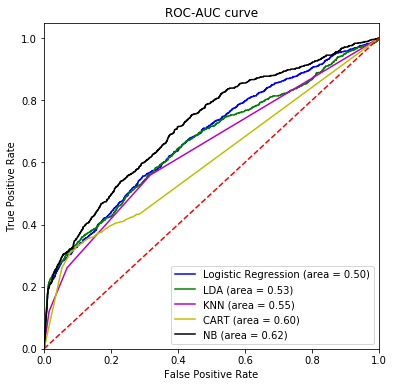

In [11]:
# Models list
models = [('Logistic Regression', LogisticRegression()), ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()), \
         ('K Nearest Neighbors', KNeighborsClassifier()), ('Decision Tree Classifier', DecisionTreeClassifier()), \
         ('Naive Bayes Classifier', GaussianNB())]

names = []
roc_scores = []
fpr = []
tpr = []
thresholds = []

for name, model in models:
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    
    # ROC scores
    score = roc_auc_score(y_test, pred)
    roc_scores.append(score)
    
    # fpr, tpr, threshold
    f, t, th = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    fpr.append(f)
    tpr.append(t)
    thresholds.append(th)
    
    # name of the models
    names.append(name)
    
# Plotting the roc curves
plt.figure(figsize = (6,6))
plt.plot(fpr[0], tpr[0], 'b-', label = 'Logistic Regression (area = %0.2f)' % roc_scores[0])
plt.plot(fpr[1], tpr[1], 'g-', label = 'LDA (area = %0.2f)' % roc_scores[1])
plt.plot(fpr[2], tpr[2], 'm-', label = 'KNN (area = %0.2f)' % roc_scores[2])
plt.plot(fpr[3], tpr[3], 'y-', label = 'CART (area = %0.2f)' % roc_scores[3])
plt.plot(fpr[4], tpr[4], 'k-', label = 'NB (area = %0.2f)' % roc_scores[4])
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')
plt.legend(loc="lower right")
# plt.savefig('ROC_curves.png')
plt.show()

<h3><b>Ensemble methods</b></h3>

/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


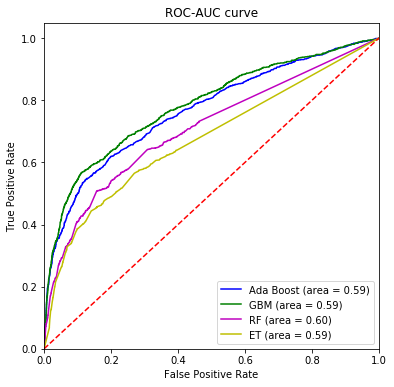

In [12]:
# Ensemble methods
# Models list - Boosting and Bagging algorithms
models_ensemble = [('Ada Boost', AdaBoostClassifier()), ('GBM', GradientBoostingClassifier()), \
         ('RF', RandomForestClassifier()), ('ET', ExtraTreesClassifier())]

names_ensemble = []
roc_scores_ensemble = []
fpr_ensemble = []
tpr_ensemble = []
thresholds_ensemble = []

for name, model in models_ensemble:
    model.fit(X_train, y_train)
    
    pr = model.predict(X_test)
    
    # ROC scores
    sc = roc_auc_score(y_test, pr)
    roc_scores_ensemble.append(sc)
    
    # fpr, tpr, threshold
    f_e, t_e, th_e = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    fpr_ensemble.append(f_e)
    tpr_ensemble.append(t_e)
    thresholds_ensemble.append(th_e)
    
    # name of the models
    names_ensemble.append(name)
    
# Plotting the roc curves
plt.figure(figsize = (6,6))
plt.plot(fpr_ensemble[0], tpr_ensemble[0], 'b-', label = 'Ada Boost (area = %0.2f)' % roc_scores_ensemble[0])
plt.plot(fpr_ensemble[1], tpr_ensemble[1], 'g-', label = 'GBM (area = %0.2f)' % roc_scores_ensemble[1])
plt.plot(fpr_ensemble[2], tpr_ensemble[2], 'm-', label = 'RF (area = %0.2f)' % roc_scores_ensemble[2])
plt.plot(fpr_ensemble[3], tpr_ensemble[3], 'y-', label = 'ET (area = %0.2f)' % roc_scores_ensemble[3])
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')
plt.legend(loc="lower right")
# plt.savefig('ROC_curves_ensemble.png')
plt.show()


In [13]:
simple_roc = pd.DataFrame({'Models':names, 'ROC_AUC_Score':roc_scores})
ensemble_roc = pd.DataFrame({'Models':names_ensemble, 'ROC_AUC_Score':roc_scores_ensemble})

final_roc = pd.concat([simple_roc, ensemble_roc], ignore_index = True).sort_values('ROC_AUC_Score', ascending = False).reset_index(drop = True)
display(final_roc)  

,Models,ROC_AUC_Score
0,Naive Bayes Classifier,0.621658
1,Decision Tree Classifier,0.604170
2,RF,0.597407
3,Ada Boost,0.594331
4,GBM,0.593580
5,ET,0.590508
6,K Nearest Neighbors,0.552665
7,Linear Discriminant Analysis,0.527664
8,Logistic Regression,0.500410


<h3>The ROC_AUC scores above are obtained without applying Standard Scaler and Cross Validation techniques on the data. So the values are a basic result.</h3>
<h3>From the work done by my team member, Amira Asta, the Gradient Boosting algorithm is found to work well than other algorithms.</h3>

<h4>Below, the train and test data are standardized to obtain the best results</h4>

In [14]:
# Standardizing the train and test datasets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rescaled_Xtrain = scaler.fit_transform(X_train)
rescaled_Xtest = scaler.fit_transform(X_test)

/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
# Finalized model
gb_model = GradientBoostingClassifier()

# Fitting the model
gb_model.fit(rescaled_Xtrain, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [16]:
# Predicting the results
final_pred = gb_model.predict(rescaled_Xtest)

print(final_pred)

[0 0 1 ... 0 0 0]


In [17]:
# Performance metrics
from sklearn.metrics import accuracy_score, mean_squared_error

gb_roc_score = roc_auc_score(y_test, final_pred)
print('ROC_AUC score = ', gb_roc_score)

print('Accuracy of the Gradient Boosting Classifier = ', accuracy_score(y_test, final_pred))
print('Mean squared error of the Gradient Boosting Classifier = ', mean_squared_error(y_test, final_pred))

ROC_AUC score =  0.5935800373653753
Accuracy of the Gradient Boosting Classifier =  0.9005585235551239
Mean squared error of the Gradient Boosting Classifier =  0.09944147644487615


In [18]:
# Confusion matrix
print('Confusion matrix:\n', confusion_matrix(y_test, final_pred))

# Classification report
print('Classification report:\n', classification_report(y_test, final_pred))

Confusion matrix:
 [[7235   86]
 [ 733  182]]
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7321
           1       0.68      0.20      0.31       915

   micro avg       0.90      0.90      0.90      8236
   macro avg       0.79      0.59      0.63      8236
weighted avg       0.88      0.90      0.88      8236



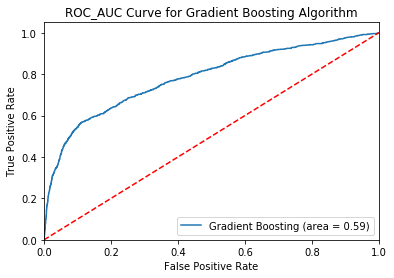

In [19]:
# ROC_AUC curve
fpr_gb, tpr_gb, threshold_gb = roc_curve(y_test, gb_model.predict_proba(rescaled_Xtest)[:,1])

plt.plot(fpr_gb, tpr_gb, label = 'Gradient Boosting (area = %0.2f)' % gb_roc_score)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC Curve for Gradient Boosting Algorithm')
plt.legend(loc = 'lower right')
plt.show()

<h3><b>Saving the model</b></h3>

In [20]:
import pickle
filename = 'finalized_model.sav'

with open(filename, 'wb') as f:
    pickle.dump(gb_model, f)